In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [3]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [4]:
data['Time'] = pd.to_datetime(data['Time'])

In [5]:
data.set_index('Time', inplace=True)

In [6]:
data.drop(columns=['ESI 2', 'ESI 1', 'ESI 3', 'ESI 5'], inplace=True)

In [7]:
esi1_daily = data['ESI 4'].resample('D').sum()

In [8]:
esi1_daily_df = esi1_daily.reset_index()

In [9]:
esi1_daily_df.columns = ['Date', 'ESI 4']

In [10]:
print(esi1_daily_df)

           Date  ESI 4
0    2017-01-01     47
1    2017-01-02     66
2    2017-01-03     51
3    2017-01-04     41
4    2017-01-05     46
...         ...    ...
1456 2020-12-27     36
1457 2020-12-28     40
1458 2020-12-29     51
1459 2020-12-30     38
1460 2020-12-31     37

[1461 rows x 2 columns]


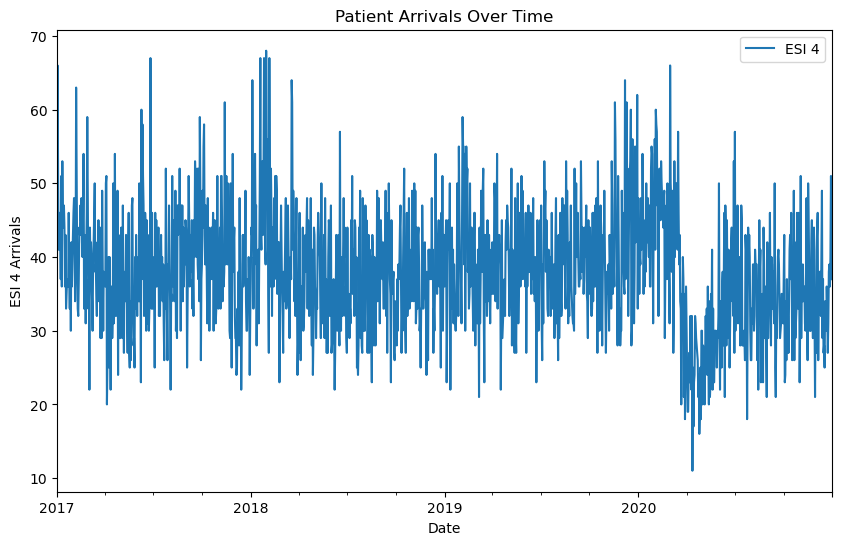

In [11]:
esi1_daily_df.plot(x='Date', y='ESI 4', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 4 Arrivals')
plt.show()

In [12]:
train_size = int(len(esi1_daily_df) * 0.9) 
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [13]:
model = auto_arima(train['ESI 4'], seasonal=True, m=7,
                   start_p=1, start_q=1, start_P=1, start_Q=1,
                   max_p=5, max_q=5, max_P=5, max_Q=5,
                   d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=9835.627, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=9483.013, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=9110.375, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=9833.630, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=9128.550, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=9109.284, Time=1.00 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=3.55 sec
 ARIMA(0,1,1)(0,0,3)[7] intercept   : AIC=9106.361, Time=2.06 sec
 ARIMA(0,1,1)(1,0,3)[7] intercept   : AIC=inf, Time=6.26 sec
 ARIMA(0,1,1)(0,0,4)[7] intercept   : AIC=9105.220, Time=3.78 sec
 ARIMA(0,1,1)(1,0,4)[7] intercept   : AIC=inf, Time=11.00 sec
 ARIMA(0,1,1)(0,0,5)[7] intercept   : AIC=9097.938, Time=5.81 sec
 ARIMA(0,1,1)(1,0,5)[7] intercept   : AIC=inf, Time=14.34

In [14]:
n_periods = len(test)
forecast_values = model.predict(n_periods=n_periods)

In [15]:
print("Forecasted values:")
print(forecast_values)

Forecasted values:
1314    32.340060
1315    32.335846
1316    33.141889
1317    33.734177
1318    34.898374
          ...    
1456    32.459606
1457    32.451623
1458    32.443640
1459    32.435656
1460    32.427671
Length: 147, dtype: float64


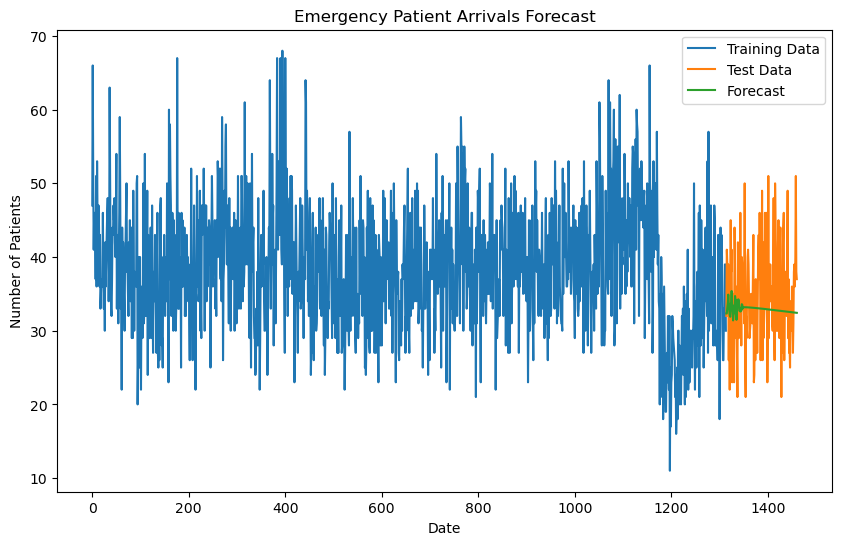

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 4'], label='Training Data')
plt.plot(test.index, test['ESI 4'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [17]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [18]:
mape = mean_absolute_percentage_error(test['ESI 4'], forecast_values)
print("MAPE:", mape)

MAPE: 16.762428420653155


In [19]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [20]:
rmse = root_mean_squared_error(test['ESI 4'], forecast_values)
print("RMSE:", rmse)

RMSE: 7.19877411625429


In [21]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 4'], forecast_values)
print("MAE:", mae)

MAE: 5.807644700144047
